In [54]:
%matplotlib inline

import numpy as np
from config import *
from generate_pdfs import *
import matplotlib.pyplot as plt

In [73]:
camp = campaigns[0]

dataPath = outPath + camp + "/train/"

In [74]:
pctr = np.load(dataPath + "pCTR.npy")
prices = np.load(dataPath + "prices.npy")

In [75]:
pctr_bins = makeBins()

pctr_pdf = get_pctr_pdf(pctr, pctr_bins)

m_pdf = get_m_pdf(prices, pctr, pctr_pdf, pctr_bins)

In [76]:
print(pctr_bins)

[  0.00000000e+00   1.00000000e-07   1.47368421e-07   1.94736842e-07
   2.42105263e-07   2.89473684e-07   3.36842105e-07   3.84210526e-07
   4.31578947e-07   4.78947368e-07   5.26315789e-07   5.73684211e-07
   6.21052632e-07   6.68421053e-07   7.15789474e-07   7.63157895e-07
   8.10526316e-07   8.57894737e-07   9.05263158e-07   9.52631579e-07
   1.00000000e-06   1.47368421e-06   1.94736842e-06   2.42105263e-06
   2.89473684e-06   3.36842105e-06   3.84210526e-06   4.31578947e-06
   4.78947368e-06   5.26315789e-06   5.73684211e-06   6.21052632e-06
   6.68421053e-06   7.15789474e-06   7.63157895e-06   8.10526316e-06
   8.57894737e-06   9.05263158e-06   9.52631579e-06   1.00000000e-05
   1.47368421e-05   1.94736842e-05   2.42105263e-05   2.89473684e-05
   3.36842105e-05   3.84210526e-05   4.31578947e-05   4.78947368e-05
   5.26315789e-05   5.73684211e-05   6.21052632e-05   6.68421053e-05
   7.15789474e-05   7.63157895e-05   8.10526316e-05   8.57894737e-05
   9.05263158e-05   9.52631579e-05

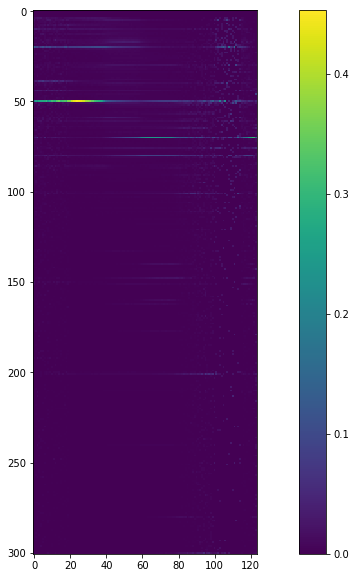

In [77]:
plt.figure(figsize=(15, 10))
plt.imshow(m_pdf.T)
plt.colorbar()

In [69]:
print(m_pdf.shape)
print(np.sum(m_pdf, axis=1))

(124, 301)
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [70]:
def medianMarketPricePolicy(m_pdf):
  m, n = m_pdf.shape
  policy = np.zeros((m,))
  for i in range(m):
    cumScore = 0
    for j in range(n):
      cumScore += m_pdf[i, j]
      if cumScore >= 0.5:
        policy[i] = j + 1
        break

  return policy

In [71]:
medianMP = medianMarketPricePolicy(m_pdf)

124


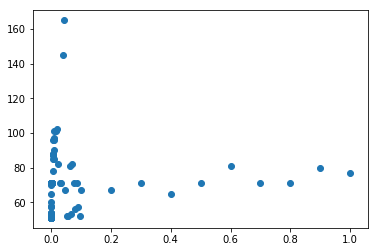

In [72]:
print(len(medianMP))
plt.scatter(pctr_bins[1:], medianMP)